1-4 Importing packages with customary aliases:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## magic command so that your plots show in the notebook without having to call plt.show() every time

5. Read in the first file and check that it imported correctly:

In [2]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6868)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


6. Read in the second file and check that it imported correctly:

In [3]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each dataframe:

In [4]:
gdp_df.shape

(6868, 4)

In [5]:
internet_df.shape

(4495, 4)

8. Look at the data types for the columns in each dataframe

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

9. Take a look at the last 10 rows of each DataFrame

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [10]:
gdp_df_v1 = gdp_df.drop(columns=['Value Footnotes'])

In [11]:
gdp_df_v1.info

<bound method DataFrame.info of      Country or Area  Year        Value
0        Afghanistan  2019  2065.036398
1        Afghanistan  2018  2033.779002
2        Afghanistan  2017  2058.383832
3        Afghanistan  2016  2057.062164
4        Afghanistan  2015  2068.265904
...              ...   ...          ...
6863        Zimbabwe  1994  3263.934978
6864        Zimbabwe  1993  3033.504852
6865        Zimbabwe  1992  3054.889178
6866        Zimbabwe  1991  3426.598094
6867        Zimbabwe  1990  3324.348171

[6868 rows x 3 columns]>

In [12]:
internet_df_v1 = internet_df.drop(columns=['Value Footnotes'])

In [13]:
internet_df_v1.info

<bound method DataFrame.info of      Country or Area  Year     Value
0        Afghanistan  2014  6.390000
1        Afghanistan  2013  5.900000
2        Afghanistan  2012  5.454545
3        Afghanistan  2011  5.000000
4        Afghanistan  2010  4.000000
...              ...   ...       ...
4490        Zimbabwe  1997  0.033080
4491        Zimbabwe  1996  0.016790
4492        Zimbabwe  1995  0.007684
4493        Zimbabwe  1994  0.001739
4494        Zimbabwe  1990  0.000000

[4495 rows x 3 columns]>

Renaming columns in each dataframe

In [14]:
gdp_df_v2 = gdp_df_v1.rename (columns=
                            {"Country or Area" : "Country",
                            "Value" : "GDP_Per_Capita"}
                            )

In [15]:
gdp_df_v2.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [16]:
internet_df_v2 = internet_df_v1.rename (columns=
                            {"Country or Area" : "Country",
                            "Value" : "Internet_Users_Pct"}
                            )

In [17]:
internet_df_v2.dtypes

Country                object
Year                    int64
Internet_Users_Pct    float64
dtype: object

Merging the two data frames in one

In [18]:
gdp_and_internet_use = gdp_df_v2.merge(internet_df_v2, on=['Country', 'Year'], how='outer')
gdp_and_internet_use.head(6)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.39


In [19]:
gdp_and_internet_use.tail(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7895,Yemen,2004,NaN,0.881223
7896,Yemen,2003,NaN,0.604734
7897,Yemen,2002,NaN,0.518796
7898,Yemen,2001,NaN,0.090802
7899,Yemen,2000,NaN,0.082500
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


Filtering for the years 2004, 2009, 2014

In [20]:
gdp_and_internet_use_v1 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
gdp_and_internet_use_v1.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
33,Albania,2004,7604.838002,2.420388
53,Algeria,2014,11512.705405,18.090000
58,Algeria,2009,10782.361398,11.230000
63,Algeria,2004,10058.435939,4.634475
83,Angola,2014,8239.828837,21.260000


Three separate data frames for each year:

In [21]:
v1_2004_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2004])]
v1_2009_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2009])]
v1_2014_gdp_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Year"].isin([2014])]

Finding the highest and lowest percentage of internet use in 2014

In [22]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 2625, dtype: object

In [23]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7079, dtype: object

Finding the highest and lowest percentage of internet use in 2004

In [24]:
v1_2004_gdp_internet.loc[v1_2004_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 6019, dtype: object

In [25]:
v1_2004_gdp_internet.loc[v1_2004_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7088, dtype: object

Finding the highest and lowest percentage of internet use in 2009

In [26]:
v1_2009_gdp_internet.loc[v1_2009_gdp_internet['Internet_Users_Pct'].idxmax()]

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 2630, dtype: object

In [27]:
v1_2009_gdp_internet.loc[v1_2009_gdp_internet['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 7083, dtype: object

Country with the highest GDP per capita in 2014

In [28]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita            156514.13385
Internet_Users_Pct                 NaN
Name: 3721, dtype: object

In [29]:
v1_2014_gdp_internet.loc[v1_2014_gdp_internet['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                      822.610458
Internet_Users_Pct                         NaN
Name: 1047, dtype: object

Scatter plots to show Internet users vs. GDP Per Capita

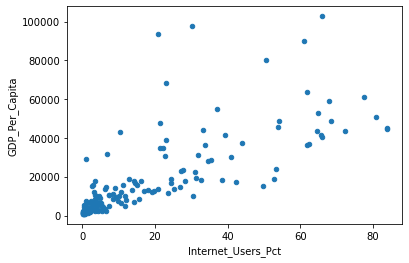

In [30]:
plt_2004 = v1_2004_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

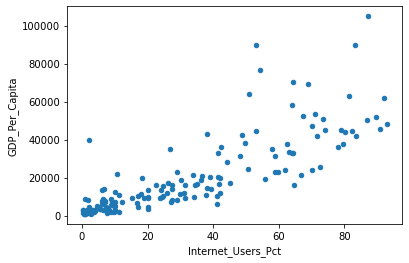

In [31]:
plt_2009 = v1_2009_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

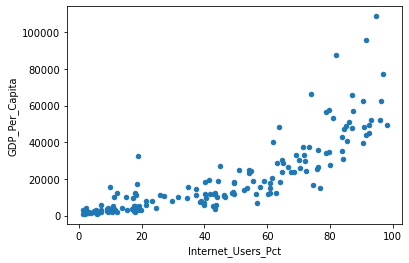

In [32]:
plt_2014 = v1_2014_gdp_internet.plot.scatter(x='Internet_Users_Pct',
                                             y='GDP_Per_Capita')

Observations: It's more likely that a country will have a higher percentage of interner users if their GDP is high, but the biggest factor seems to be time - with time, most countries have increased the percentage of internet users regardless of GDP.

Distribution of data for 2014

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

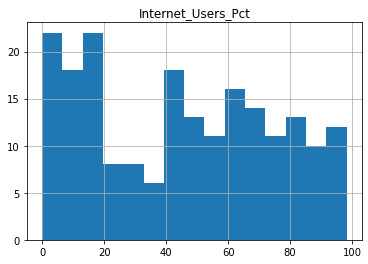

In [33]:
v1_2014_gdp_internet.hist('Internet_Users_Pct', bins = 15)

This is not unimodal

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

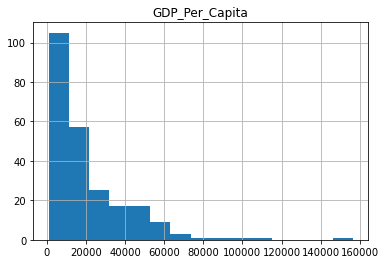

In [34]:
v1_2014_gdp_internet.hist('GDP_Per_Capita', bins = 15)

This is unimodal.

In [35]:
v1_2014_gdp_internet.nlargest(5, 'Internet_Users_Pct')['Country']

2625    Iceland
561     Bermuda
4648     Norway
1452    Denmark
6871    Andorra
Name: Country, dtype: object

In [36]:
top_5_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Country"].isin
                                         (['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])]

In [37]:
top_5_internet.shape

(15, 4)

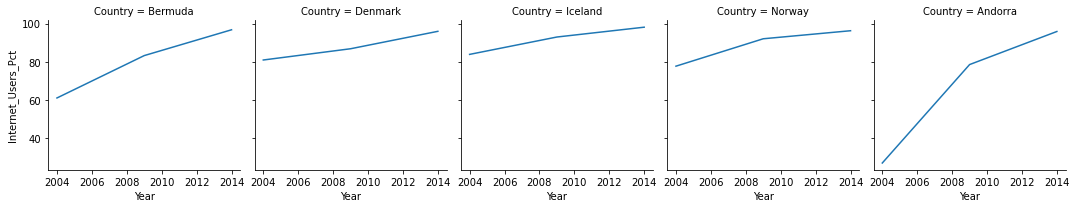

In [52]:
graph = sns.FacetGrid(top_5_internet, col="Country")
graph.map(sns.lineplot, "Year", "Internet_Users_Pct")

lowest internet usage

In [40]:
low_5_internet = v1_2014_gdp_internet

In [41]:
low_5_internet.nsmallest(5, 'Internet_Users_Pct')['Country']

7079    Dem. People's Rep. of Korea
7137                        Eritrea
6219                    Timor-Leste
827                         Burundi
7674                        Somalia
Name: Country, dtype: object

In [42]:
low_5_internet = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Country"].isin
                                         (["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste", "Burundi", "Somalia"])]

In [43]:
print(low_5_internet)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                       Burundi  2014      886.235777            1.380000
832                       Burundi  2009      831.564131            0.900000
837                       Burundi  2004      817.460585            0.349060
6219                  Timor-Leste  2014     3264.568070            1.140000
6224                  Timor-Leste  2009     2724.770973            0.185252
6229                  Timor-Leste  2004     2258.608056                 NaN
7079  Dem. People's Rep. of Korea  2014             NaN            0.000000
7083  Dem. People's Rep. of Korea  2009             NaN            0.000000
7088  Dem. People's Rep. of Korea  2004             NaN            0.000000
7137                      Eritrea  2014             NaN            0.990000
7142                      Eritrea  2009             NaN            0.540000
7674                      Somalia  2014             NaN            1.630000
7678        

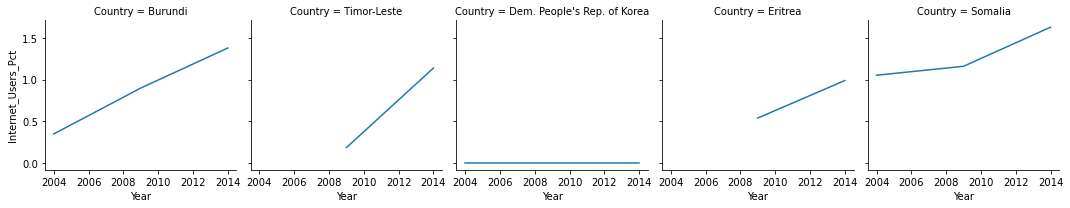

In [53]:
graph = sns.FacetGrid(low_5_internet, col="Country")
graph.map(sns.lineplot, "Year", "Internet_Users_Pct")

In [70]:
v1_2014_gdp_internet.nlargest(5, 'GDP_Per_Capita')['Country']

3721    Macao SAR, China
3691          Luxembourg
5138               Qatar
5464           Singapore
561              Bermuda
Name: Country, dtype: object

In [71]:
top_gdp_10_year = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Country"].isin
                                          (["Macao SAR, China", "Luxembourg", "Qatar", "Singapore", "Bermuda"])]

In [72]:
print(top_gdp_10_year)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
561            Bermuda  2014    77361.104881           96.800000
566            Bermuda  2009    89961.982744           83.250000
571            Bermuda  2004    90195.811033           60.990867
3691        Luxembourg  2014   108760.916030           94.670000
3696        Luxembourg  2009   104932.811953           87.310000
3701        Luxembourg  2004   102708.212547           65.880000
3721  Macao SAR, China  2014   156514.133850                 NaN
3726  Macao SAR, China  2009    95939.340822                 NaN
3731  Macao SAR, China  2004    72944.409424                 NaN
5138             Qatar  2014    95578.416973           91.490000
5143             Qatar  2009    89954.519993           53.100000
5148             Qatar  2004    93748.301216           20.701648
5464         Singapore  2014    87808.663157           82.000000
5469         Singapore  2009    69466.581746           69.000000
5474         Singapore  2

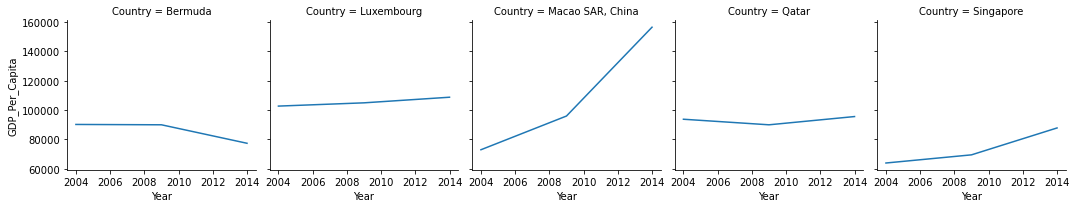

In [74]:
graph = sns.FacetGrid(top_gdp_10_year, col="Country")
graph.map(sns.lineplot, "Year", "GDP_Per_Capita")

In [75]:
v1_2014_gdp_internet.nsmallest(5, 'GDP_Per_Capita')['Country']

1047    Central African Republic
827                      Burundi
3781                      Malawi
1422             Dem. Rep. Congo
4528                       Niger
Name: Country, dtype: object

In [76]:
low_gdp_10_year = gdp_and_internet_use_v1[gdp_and_internet_use_v1["Country"].isin
                                          (["Central African Republic", "Burundi", "Malawi", "Dem. Rep. Congo", "Niger"])]

In [77]:
print(low_gdp_10_year)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                    Burundi  2014      886.235777            1.380000
832                    Burundi  2009      831.564131            0.900000
837                    Burundi  2004      817.460585            0.349060
1047  Central African Republic  2014      822.610458                 NaN
1052  Central African Republic  2009     1161.189475                 NaN
1057  Central African Republic  2004     1037.846766                 NaN
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
1427           Dem. Rep. Congo  2009      835.611696                 NaN
1432           Dem. Rep. Congo  2004      757.685942                 NaN
3781                    Malawi  2014     1027.208496            5.830000
3786                    Malawi  2009      932.867635            1.070000
3791                    Malawi  2004      775.346132            0.347505
4528                     Niger  2014     1127.61554

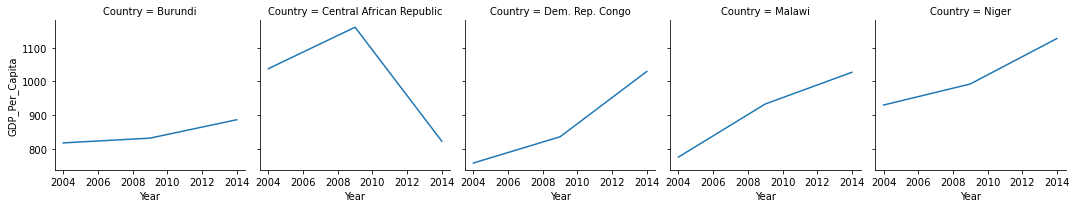

In [78]:
graph = sns.FacetGrid(low_gdp_10_year, col="Country")
graph.map(sns.lineplot, "Year", "GDP_Per_Capita")